<img src="../../doc/source/_static/xdem_logo.svg" width="100" align="right">

# xDEM Classification Tutorial

This notebook demonstrates the use of the `xdem` package for terrain analysis, focusing on key operations such as visualization, classification, masking, and terrain metric calculations. Digital Elevation Models (DEMs) offer detailed representations of Earth's surface, and with the tools available in the `xdem` package, it is possible to analyze and derive various topographic attributes. By combining terrain attributes such as slope and roughness with classification techniques and mask application, we can conduct more targeted analyses on specific regions of interest. The goal of this notebook is to showcase the capabilities of `xdem` for both visual and statistical exploration of terrain data.

In [1]:
import xdem
import geoutils as gu
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Load the DEM using xdem
dem = xdem.DEM(xdem.examples.get_path("longyearbyen_ref_dem"))

# Print DEM informations
dem.info()

Driver:               GTiff 
Opened from file:     /home/vschaffn/Documents/xdem/examples/data/Longyearbyen/data/DEM_2009_ref.tif 
Filename:             /home/vschaffn/Documents/xdem/examples/data/Longyearbyen/data/DEM_2009_ref.tif 
Loaded?               True 
Modified since load?  False 
Grid size:            1332, 985
Number of bands:      1
Data types:           float32
Coordinate system:    ['EPSG:25833']
Nodata value:         -9999.0
Pixel interpretation: Area
Pixel size:           20.0, 20.0
Upper left corner:    502810.0, 8654330.0
Lower right corner:   529450.0, 8674030.0



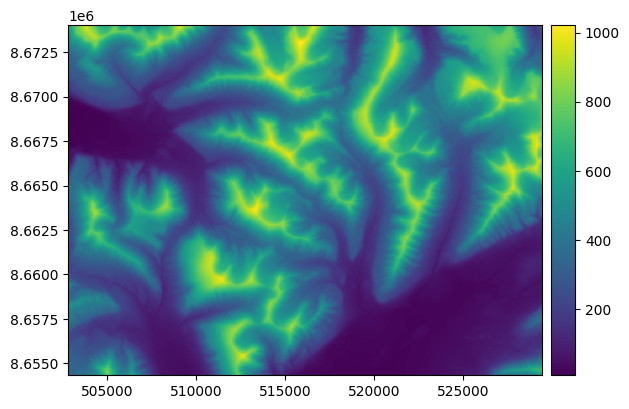

In [3]:
# Plot the DEM
dem.plot()

## Terrain attributes visualization
The `xdem` package can be used to compute and visualize a variety of terrain attributes derived from Digital Elevation Models (DEMs). These attributes, such as slope, aspect, curvature, and hillshade, provide information about the surface characteristics of the landscape.

### 1. Slope
Slope measures the steepness of the terrain and is expressed in degrees. Steeper slopes have higher values, while flat areas have lower values.

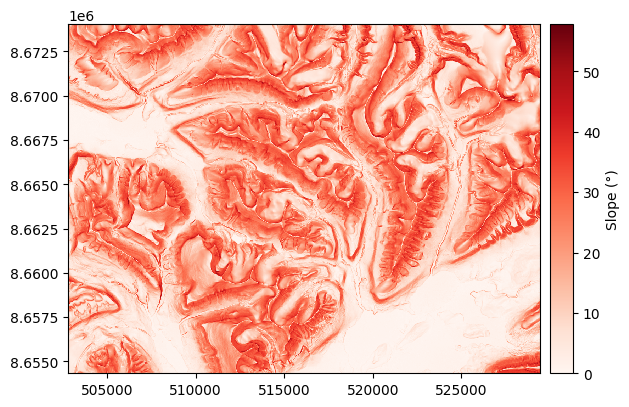

In [4]:
slope = dem.slope()
slope.plot(cmap="Reds", cbar_title= "Slope (°)")

### 2 Roughness
Roughness quantifies the irregularity of the terrain by comparing the elevation changes between adjacent pixels. Higher roughness values indicate more uneven terrain.

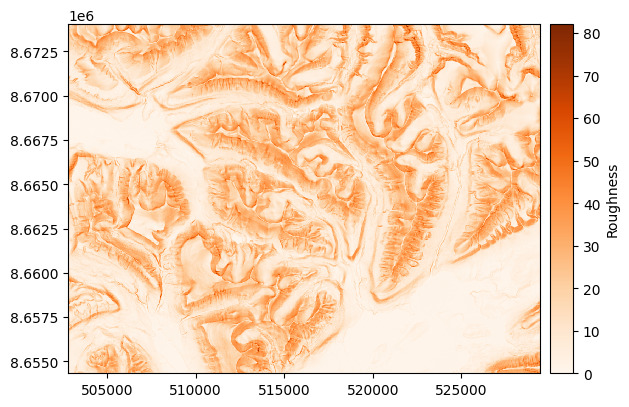

In [5]:
roughness = dem.roughness()
roughness.plot(cmap="Oranges", cbar_title="Roughness")

## Classification of Terrain Attributes
Classification of Terrain attributes is an essential step for segmenting landscapes based on specific criteria, such as slope or roughness classes. By classifying these attributes into different categories, we can better understand the geographical features of an area.

In this section, we will demonstrate how to use `xdem` to classify terrain attributes like slope, roughness, and other calculated attributes.

### 1. Elevation classification

In [6]:
# Define intervals for elevation classes
# Example: [0-400m], [400-800m], [+800m]
elevation_bins = [0, 400, 800, np.inf] 

# Apply classification
elevation_classes = np.digitize(dem.data, elevation_bins)

# Save classification
elevation_classes_raster = dem.copy(new_array=elevation_classes)
elevation_classes_raster.save('elevation_classes.tif')

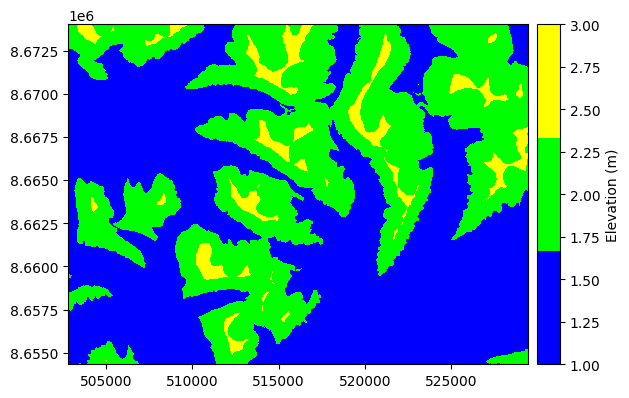

In [7]:
# Plot
# Colormap configuration
colors = np.array([
    [0, 0, 1, 1],      # blue for class 1
    [0, 1, 0, 1],      # green for class 2
    [1, 1, 0, 1],      # yellow for class 3
])
cmap = ListedColormap(colors)

# Visualize classified elevation
elevation_classes_raster.plot(cmap=cmap, cbar_title="Elevation (m)")

### 2. Slope classification

In [8]:
# Define intervals for slope classes
# Example: [0-5°], [5-10°], [10-25°], [25-45°], [>45°]
slope_bins = [0, 5, 10, 25, 45, np.inf]

# Apply classification
slope_classes = np.digitize(slope.data, slope_bins)

# Save classification
slope_classes_raster = dem.copy(new_array=slope_classes)
slope_classes_raster.save('slope_classes.tif')

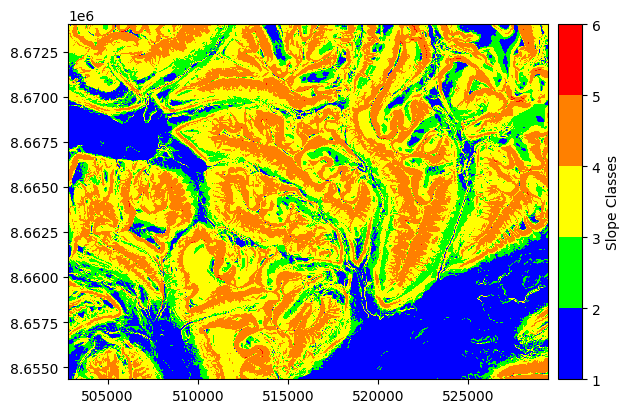

In [9]:
# Plot
# Colormap configuration
colors = np.array([
    [0, 0, 1, 1],      # blue for class 1
    [0, 1, 0, 1],      # green for class 2
    [1, 1, 0, 1],      # yellow for class 3
    [1, 0.5, 0, 1],    # orange for class 4
    [1, 0, 0, 1]       # red for class 5
])
cmap = ListedColormap(colors)

# Visualize classified slope
slope_classes_raster.plot(cmap=cmap, cbar_title="Slope Classes")

### 3. Roughness Classification

In [10]:
# Define intervals for roughness classes
# Example: flat to slightly rough, moderately rough, highly rough, very chaotic
roughness_bins = [0, 10, 20, 30, np.inf]  # np.inf to capture the highest values

# Classify roughness
roughness_classes = np.digitize(roughness.data, roughness_bins)

# Save classification
roughness_classes_raster = dem.copy(new_array=roughness_classes)
roughness_classes_raster.save('roughness_classes.tif')

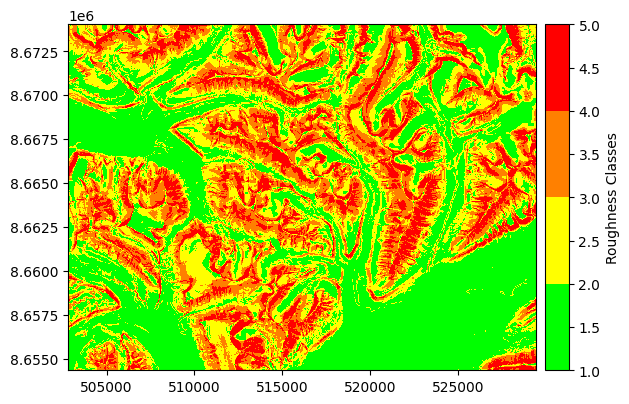

In [11]:
# Plot
# Colormap configuration
colors = np.array([
    [0, 1, 0, 1],      # green for class 1
    [1, 1, 0, 1],      # yellow for class 2
    [1, 0.5, 0, 1],    # orange for class 3
    [1, 0, 0, 1]       # red for class 4
])
cmap = ListedColormap(colors)

# Visualize classified roughness
roughness_classes_raster.plot(cmap=cmap, cbar_title="Roughness Classes")

## Masking in Terrain Analysis
In terrain analysis, masks are often used to focus on specific areas of interest within a Digital Elevation Model (DEM).

In this notebook, we will explore how classification masks can be applied to terrain attributes computed from DEMs using the `xdem` package. The mask allows us to isolate certain regions of the landscape and apply classification techniques only within those regions. This is useful for focusing on areas with specific characteristics—such as a particular elevation range, slope, or roughness—that are relevant to a given study or analysis.

### 1. Elevation mask

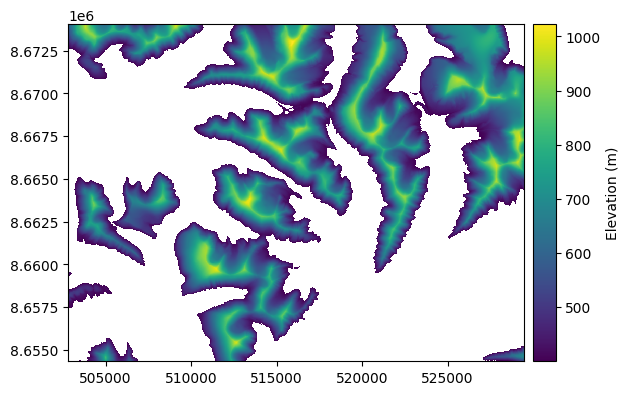

In [12]:
# Load the mask using geoutils (We use the elevation classes computed before)
elevation_classes = gu.Raster('elevation_classes.tif')

# Convert the mask into Boolean arrays
# For exemple we want to focus on the highests regions of the DEM (+400m, classes 2 and 3).
boolean_mask = np.where(elevation_classes.data >= 2, False, True)

# Apply mask
masked_elevation_dem = dem.copy()
masked_elevation_dem.set_mask(boolean_mask)

# Plot
masked_elevation_dem.plot(cbar_title = "Elevation (m)")

### 2. Slope mask

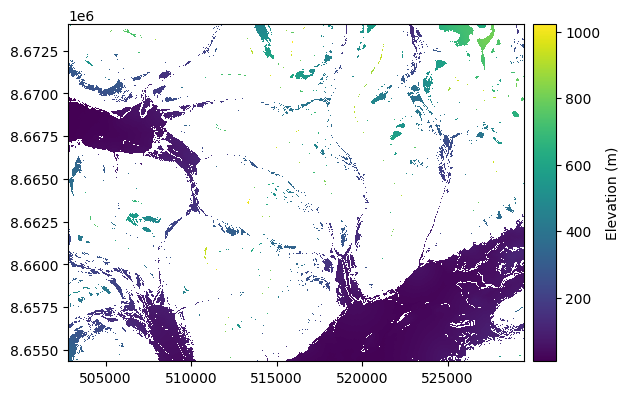

In [13]:
# Load the mask using geoutils (We use the slope classes computed before)
slope_classes = gu.Raster('slope_classes.tif')

# Convert the mask into Boolean arrays
# For exemple we want to focus on the flattest regions of the DEM (0-5°, class 1).
boolean_mask = np.where(slope_classes.data == 1, False, True)

# Apply mask
masked_slope_dem = dem.copy()
masked_slope_dem.set_mask(boolean_mask)

# Plot
masked_slope_dem.plot(cbar_title="Elevation (m)")

### 3. Roughness mask

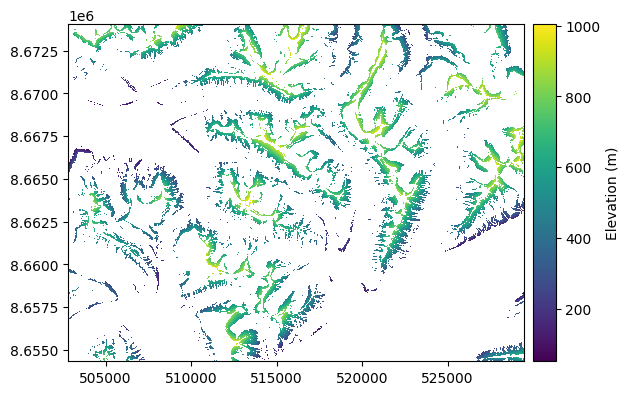

In [14]:
# Load the mask using geoutils (We use the roughness classes computed before)
roughness_classes = gu.Raster('roughness_classes.tif')

# Convert the mask into Boolean arrays
# For exemple we want to focus on the roughest regions of the DEM (class 4).
boolean_mask = np.where(roughness_classes.data == 4, False, True)

# Apply mask
masked_roughness_dem = dem.copy()
masked_roughness_dem.set_mask(boolean_mask)

# Plot
masked_roughness_dem.plot(cbar_title="Elevation (m)")

## Terrain Metrics
In addition to visualizing and classifying terrain attributes, it is possible to compute a range of **terrain metrics** using the `xdem` package. These merics can be calculated both across the entire DEM or within specific classified regions or masked areas, providing flexibility for detailed analysis.

Some of the key metrics we will explore include:

**1. Mean:** The average value of a given terrain attribute (e.g., slope, roughness), providing a general sense of the landscape's characteristics.

**2. Standard Deviation:** A common measure of the spread of values in the dataset, indicating how much variation exists from the mean.

**3. NMAD (Normalized Median Absolute Deviation):** A robust measure of variability or dispersion that is less sensitive to outliers compared to standard deviation, making it ideal for analyzing irregular terrains.

**4. Min/Max Values:** The minimum and maximum values of a terrain attribute, which can highlight extremes in the landscape, such as the steepest slopes or highest elevations.

In [15]:
# metrics function
def metrics(raster):
    mean = np.nanmean(raster.data)  # nanmean ignore NaN values in the array
    std = np.nanstd(raster.data)  # nanstd ignore NaN values in the array
    nmad = xdem.spatialstats.nmad(raster)  # nmad calculation is implemented in xdem
    mini = np.nanmin(raster.data)  # nanmin ignore NaN values in the array
    maxi = np.nanmax(raster.data)  # nanmax ignore NaN values in the array
    print('Mean: ', mean)
    print('Std: ', std)
    print('NMAD: ', nmad)
    print('Min: ', mini)
    print('Max: ', maxi)

masked_dem = masked_elevation_dem  # try with masked_elevation_dem, masked_slope_dem, masked_roughness_dem

In [16]:
# Original DEM
metrics(dem)

Mean:  378.05112
Std:  243.71904
NMAD:  290.22383649902343
Min:  8.052481
Max:  1022.211


In [17]:
# Masked DEM
metrics(masked_dem)

Mean:  607.92633
Std:  138.38376
NMAD:  160.1234468536377
Min:  400.00006
Max:  1022.211


In [18]:
# Original DEM slope
metrics(slope)

Mean:  16.26165818266721
Std:  11.164216712786864
NMAD:  14.159602233243469
Min:  0.0
Max:  57.78410040004881


In [19]:
# Masked DEM slope
metrics(masked_dem.slope())

Mean:  22.615626542922858
Std:  9.75818721607069
NMAD:  10.952563521716014
Min:  0.0
Max:  57.78410040004881


In [20]:
# Original DEM roughness
metrics(roughness)

Mean:  15.771389573142258
Std:  11.41122898539248
NMAD:  13.39440424747467
Min:  0.0
Max:  82.05645751953125


In [21]:
# Masked DEM roughness
metrics(masked_dem.roughness())

Mean:  22.140553725361436
Std:  10.50777279521165
NMAD:  11.963416479492187
Min:  0.0
Max:  82.05645751953125
